In [1]:
# %% Cell 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [21]:
# %% Cell 2: Load Dataset
# Load your dataset into the DataFrame 'df'.
# For example, if your dataset is in a CSV file:
df = pd.read_csv('wine.csv')


In [22]:
# %% Cell 3: Encode the Target Variable
# Convert the 'good/bad' column from string labels to numerical (0 for 'bad', 1 for 'good').
df['good/bad'] = df['good/bad'].map({'bad': 0, 'good': 1})
# If your column values differ, adjust the mapping accordingly.


In [25]:
# %% Cell 4: Prepare Features and Target Variables
# Separate the features and the target variable.
X = df.drop('good/bad', axis=1)
y = df['good/bad']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good/bad
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [24]:
# Use one-hot encoding for the 'type' column.
# This will create a new column 'type_red' where 1 indicates 'red' and 0 indicates 'white'.
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good/bad,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,True
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,True
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,True
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,True
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,True


In [26]:
# %% Cell 5: Perceptron Model
# Initialize, train, and evaluate the Perceptron classifier.
perc_model = Perceptron(random_state=42)
perc_model.fit(X_train, y_train)
y_pred_perc = perc_model.predict(X_test)

acc_perc = accuracy_score(y_test, y_pred_perc)
report_perc = classification_report(y_test, y_pred_perc)

print("Perceptron Accuracy:", acc_perc)
print("Perceptron Classification Report:")
print(report_perc)


Perceptron Accuracy: 0.9649303764827231
Perceptron Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1550
           1       0.91      0.92      0.91       389

    accuracy                           0.96      1939
   macro avg       0.94      0.95      0.95      1939
weighted avg       0.97      0.96      0.96      1939



In [30]:
# Evaluate the Perceptron model on the training data
y_train_pred_perc = perc_model.predict(X_train)
acc_train_perc = accuracy_score(y_train, y_train_pred_perc)
print("Perceptron Training Accuracy:", acc_train_perc)

Perceptron Training Accuracy: 0.964633068081344


In [27]:
# %% Cell 6: Support Vector Machine (SVM) Model
# Initialize, train, and evaluate the SVM classifier.
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", acc_svm)
print("SVM Classification Report:")
print(report_svm)


SVM Accuracy: 0.7993811242908716
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1550
           1       0.00      0.00      0.00       389

    accuracy                           0.80      1939
   macro avg       0.40      0.50      0.44      1939
weighted avg       0.64      0.80      0.71      1939



C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [28]:
# %% Cell 7: Logistic Regression Model
# Initialize, train, and evaluate the Logistic Regression classifier.
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

acc_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

print("Logistic Regression Accuracy:", acc_logreg)
print("Logistic Regression Classification Report:")
print(report_logreg)


Logistic Regression Accuracy: 1.0
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1550
           1       1.00      1.00      1.00       389

    accuracy                           1.00      1939
   macro avg       1.00      1.00      1.00      1939
weighted avg       1.00      1.00      1.00      1939



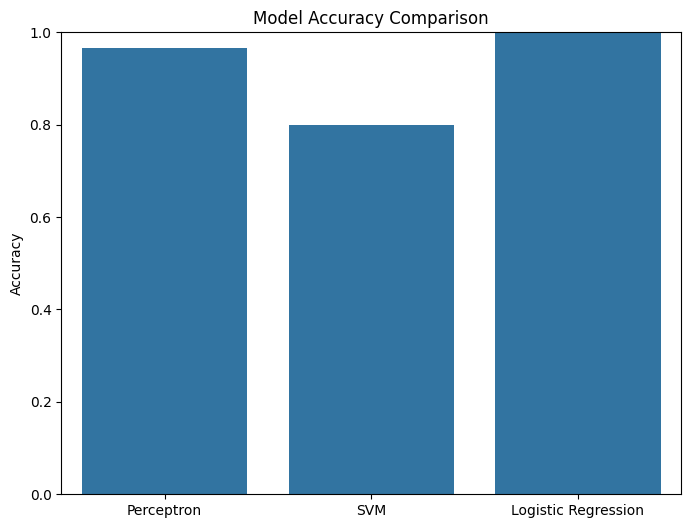

In [29]:
# %% Cell 8: Plotting Accuracy Comparison
# Create a bar plot to compare the accuracy of all three models.
models = ['Perceptron', 'SVM', 'Logistic Regression']
accuracies = [acc_perc, acc_svm, acc_logreg]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()
